
[Dataset](https://www.kaggle.com/datasets/datamunge/sign-language-mnist)



# Initial End-to-End Workflow (Start)

In [101]:
# Importing required libraries

from sklearn.preprocessing import LabelBinarizer
from tensorflow import keras

import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
# loading the training data (X+y)
train_df = pd.read_csv('data/alphabet/sign_mnist_train.csv')

In [3]:
train_df = train_df.sample(frac=1, random_state=42) # Shuffiling the entire dataset

In [4]:
X, y = train_df.drop('label', axis=1), train_df['label'] # Split the dataset into X, y

In [5]:
X.shape, y.shape

((27455, 784), (27455,))

In [6]:
np.unique(X.dtypes), y.dtype

(array([dtype('int64')], dtype=object), dtype('int64'))

In [7]:
label_binarizer = LabelBinarizer() # Binarize labels in a one-vs-all fashion (return one-hot encoded vectors)
y = label_binarizer.fit_transform(y)

In [8]:
X = X/255.0 # Normalizing the training data and converting the data type to float

In [9]:
np.unique(X.dtypes)

array([dtype('float64')], dtype=object)

In [10]:
# Converting the 1-D array of 784 pixels to (28, 28, 1) Image
# (28, 28) represents the spatial dimensions of the image & 1 specifies that the image is grayscale
X = tf.reshape(X, [-1, 28, 28, 1])

In [11]:
X.shape, y.shape

(TensorShape([27455, 28, 28, 1]), (27455, 24))

In [12]:
# Generating a validation set

X_train, X_valid = X[:25000], X[25000:]
y_train, y_valid = y[:25000], y[25000:]

In [13]:
X_train[0].dtype

tf.float64

In [14]:
X_train[0].shape

TensorShape([28, 28, 1])

(<matplotlib.image.AxesImage at 0x304785950>,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1]))

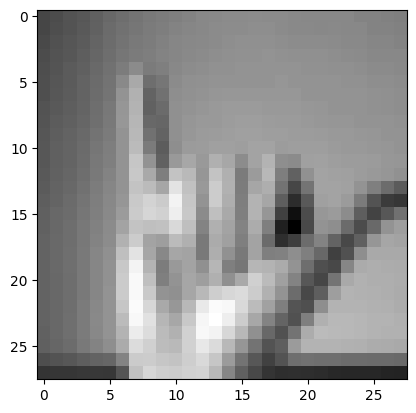

In [15]:
plt.imshow(X[0], cmap='gray'), y[0]

In [16]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),  # Define the input shape here
    keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, (5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(24, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,704 (1.56 MB)

 Trainable params: 407,704 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
save_best_cb = keras.callbacks.ModelCheckpoint('models/initial-end-to-end.keras', save_best_only=True) # Saves the best model so far
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5) # Interupts training when there is no progress

In [20]:
# The model is same is 'models/initial-end-to-end'
# The history object is 'models/initial-end-to-end-history'

history = model.fit(X_train, y_train, epochs=25, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.5337 - loss: 1.5286 - val_accuracy: 0.9947 - val_loss: 0.0235
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9987 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 5.5446e-04
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 1.0000 - loss: 3.8010e-04 - val_accuracy: 1.0000 - val_loss: 2.1131e-04
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 1.0000 - loss: 1.4984e-04 - val_accuracy: 1.0000 - val_loss: 1.0816e-04
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 1.0000 - loss: 7.9263e-05 - val_accuracy: 1.0000 - val_loss: 6.3069e-05
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 1.0000 - loss: 4.1792e-05 - val_accuracy: 1.0000 - val_loss: 3.5633e-05
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 1.0000 - loss: 2.5174e-05 - val_accuracy: 1.0000 - val_loss: 1.9973e-05
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 22

In [21]:
history.history # Contains the training related information for each epoch

{'accuracy': [0.7946000099182129,
  0.9994800090789795,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9792400002479553,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.6658291220664978,
  0.004059753846377134,
  0.000305729394312948,
  0.00012722394603770226,
  7.208591705420986e-05,
  3.9284972444875166e-05,
  2.261585723317694e-05,
  1.3629482054966502e-05,
  9.745918760017958e-06,
  5.288089141686214e-06,
  3.2697423648642143e-06,
  2.054734295597882e-06,
  1.311523874392151e-06,
  8.626439580439182e-07,
  5.821956960971875e-07,
  0.08636277168989182,
  0.0003295314672868699,
  8.506829908583313e-05,
  3.166197348036803e-05,
  1.6491205315105617e-05],
 'val_accuracy': [0.9947046637535095,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.02353881672024727,
  0.000554456899408251,
  0.00021130523236934096,
  0.00010815931454999372,
  6.30691720

In [22]:
h = np.load('models/intial-end-to-end-history', allow_pickle=True)
h

{'loss': [0.8774073719978333,
  0.005074513144791126,
  0.0005907623562961817,
  0.035671062767505646,
  0.00012915894330944866,
  6.119009776739404e-05,
  3.5120148822898045e-05,
  2.134285750798881e-05,
  1.3638154086947907e-05,
  8.999433703138493e-06,
  5.808890364278341e-06,
  3.864049176627304e-06,
  2.576162614786881e-06,
  1.7137577970061102e-06,
  1.1716660992533434e-06,
  7.670482204957807e-07,
  5.091210937280266e-07,
  3.424441104016296e-07,
  2.2814701594597864e-07,
  1.518342855888477e-07],
 'accuracy': [0.7325999736785889,
  0.9993600249290466,
  1.0,
  0.9892799854278564,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.02665344439446926,
  0.0010351891396567225,
  0.0004752879322040826,
  0.00024525265325792134,
  0.00010227379971183836,
  5.5580920161446556e-05,
  3.293823101557791e-05,
  2.091940950776916e-05,
  1.3808692528982647e-05,
  8.840480404614937e-06,
  5.666528068104526e-06,
  3

In [23]:
best_model = keras.models.load_model('models/initial-end-to-end.keras') # Model with best set of parameters not necessarily the model at the last epoch of training

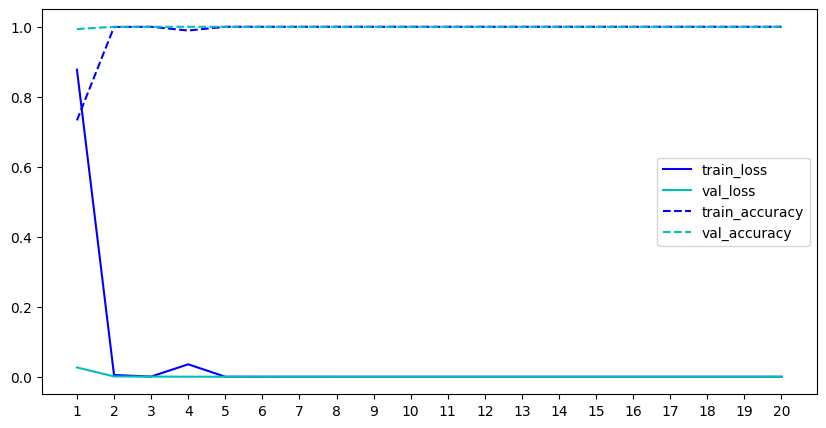

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])
ax.plot(range(1, n_epochs+1), h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='c', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='c', label='val_accuracy', linestyle='--')
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

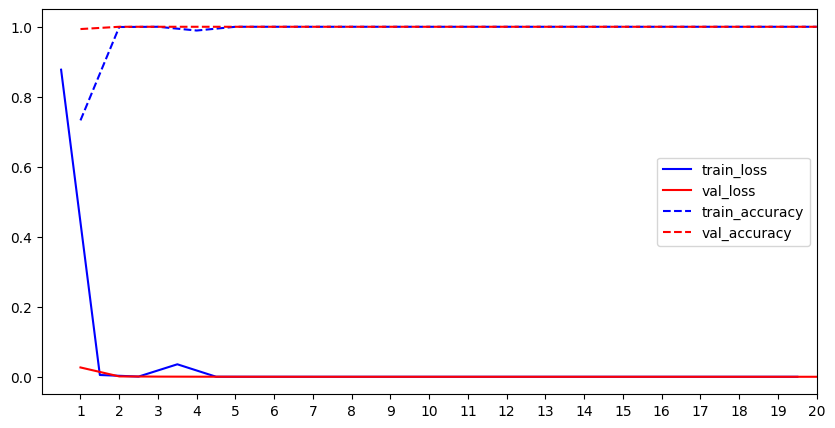

In [25]:
# Training Loss Correction

fig, ax = plt.subplots(figsize=(10, 5))
n_epochs = len(h['loss'])


x_loss = np.arange(n_epochs+1)-0.5
ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
ax.set_xlim(0, n_epochs)
ax.set_xticks(range(1, n_epochs+1))
ax.legend()

In [26]:
# Defining a function the get the training and validation plots representing the accuracy and loss at each epoch

def get_train_val_plots(h, yticks=None, figsize=(10, 5)):

    fig, ax = plt.subplots(figsize=figsize)
    n_epochs = len(h['loss'])
    x_loss = np.arange(n_epochs+1)-0.5
    
    ax.plot(x_loss[x_loss >= 0], h['loss'], color='b', label='train_loss')
    ax.plot(range(1, n_epochs+1), h['val_loss'], color='r', label='val_loss')
    ax.plot(range(1, n_epochs+1), h['accuracy'], color='b', label='train_accuracy', linestyle='--')
    ax.plot(range(1, n_epochs+1), h['val_accuracy'], color='r', label='val_accuracy', linestyle='--')
    ax.set_xlim(0, n_epochs)
    ax.set_xticks(range(1, n_epochs+1))
    if yticks is not None:
        ax.set_yticks(yticks)
    ax.legend()

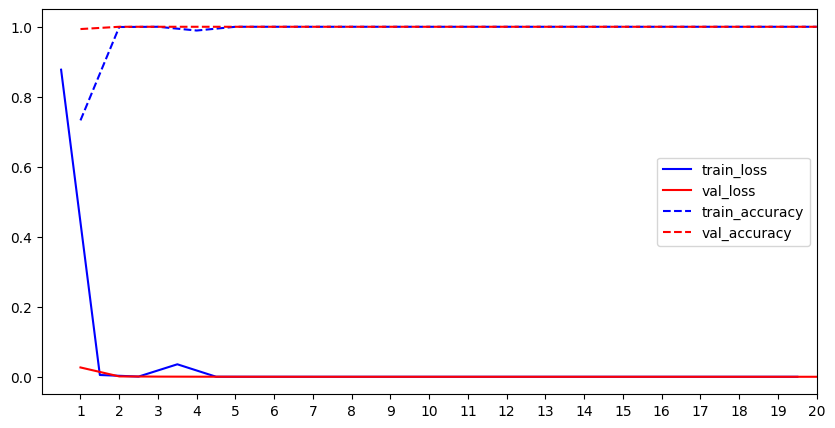

In [27]:
get_train_val_plots(h)

In [28]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [29]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [30]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [31]:
y_test = label_binarizer.transform(y_test)

In [32]:
best_model.evaluate(X_test, y_test)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9131 - loss: 113.2672


[120.70211791992188, 0.9090909361839294]

Accuracy: 94%

In [33]:
# Preprocesses the input and evaluates the model

def evaluate_model(model, X_test, y_test, label_binarizer):
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    y_test_labels = label_binarizer.transform(y_test)
    results = model.evaluate(X_test_reshape, y_test_labels)
    print(f'Loss: {results[0]:.3f} Accuracy: {results[1]:.3f}')

In [34]:
results = evaluate_model(best_model, test_df.drop('label', axis=1), test_df['label'], label_binarizer)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9131 - loss: 113.2672
Loss: 120.702 Accuracy: 0.909


## Converting Images to a Sentence

In [35]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv') # Load the test data

In [36]:
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [37]:
X_test = tf.reshape(X_test, [-1, 28, 28, 1])

In [38]:
d = {chr(ord('a') + i):i for i in range(26)}
d_rev = {i:chr(ord('a') + i) for i in range(26)}
d[' '] = d_rev[' '] = ' '

In [39]:
sentence = 'sign language'

for i in sentence:
    print(d[i], end=' ')

18 8 6 13   11 0 13 6 20 0 6 4 

In [40]:
best_model.predict(tf.reshape(X_test[0], [-1, 28, 28, 1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
images_taken = []
result = ''

for i in sentence:
    if i != ' ':
        char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
        images_taken.append(char_index)
        y_pred = best_model.predict(tf.reshape(X_test[char_index], [-1, 28, 28, 1]))
        result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
    else:
        result += ' '
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
sign language


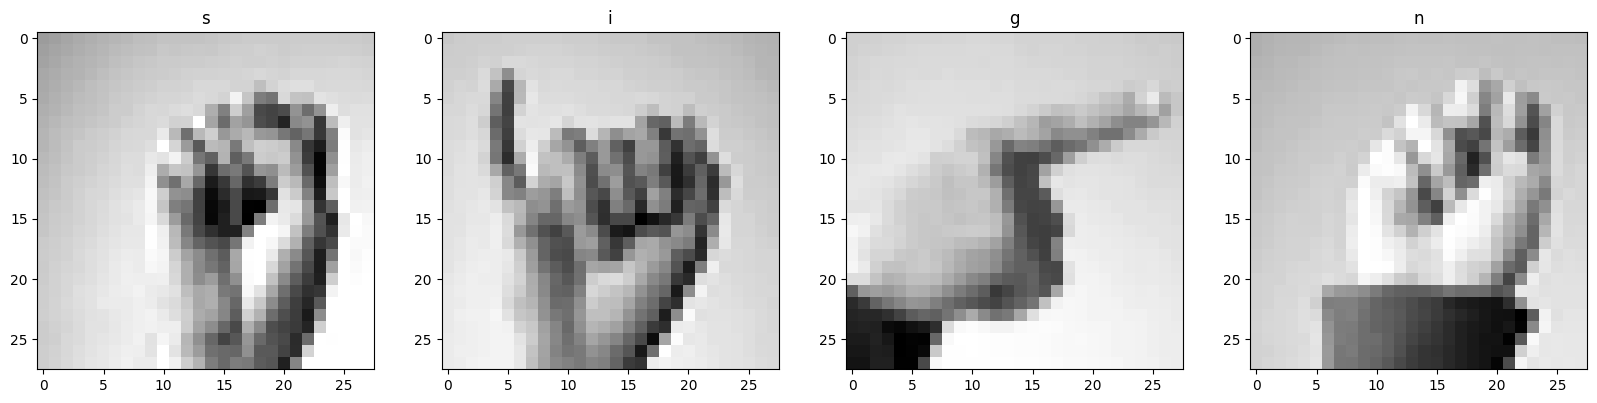

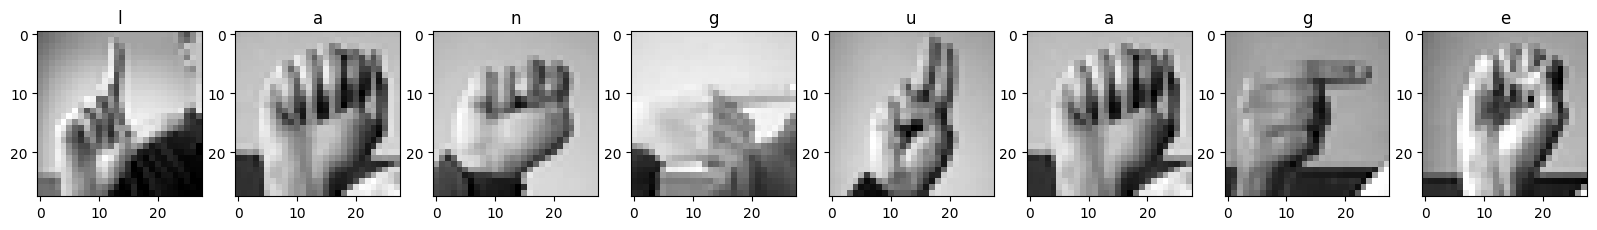

In [42]:
# Visualizing the test images
images_taken_dup = list(reversed(images_taken))
for word in sentence.split():
    fig, ax = plt.subplots(1, len(word), figsize=(20, 20))
    for i in range(len(word)):
        ax[i].imshow(X_test[images_taken_dup.pop()], cmap='gray')
        ax[i].set_title(word[i])

In [43]:
def test_on_sentence(model, sentence, X_test, y_test, label_binarizer, figsize=(20, 20)):
    # Random images are taken from X_test along with the corresponding labels in y_test
    # based on the letters in the sentence.
    # These images are fed to the model and its output is printed

    sentence = sentence.lower()
    
    d = {chr(ord('a') + i):i for i in range(26)}
    d_rev = {i:chr(ord('a') + i) for i in range(26)}
    d[' '] = d_rev[' '] = ' '

    images_taken = []
    result = ''
    
    X_test_reshape = tf.reshape(X_test, [-1, 28, 28, 1])
    

    for i in sentence:
        if i != ' ':
            char_index = np.random.choice(y_test[y_test==ord(i)-ord('a')].index)
            images_taken.append(char_index)
            y_pred = model.predict(tf.reshape(X_test_reshape[char_index], [1, 28, 28, 1]))
            result += d_rev[label_binarizer.inverse_transform(y_pred)[0]]
        else:
            result += ' '
            
    print(f'The actual sentence is "{sentence}"')
    print(f'The predicted sentence is "{result}"')
        
    images_taken.reverse()
    for word in sentence.split():
        fig, ax = plt.subplots(1, len(word), figsize=figsize)
        for i in range(len(word)):
            ax[i].imshow(X_test_reshape[images_taken.pop()], cmap='gray')
            ax[i].set_title(word[i])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
The actual sentence is "sign language"
The predicted sentence is "sign language"


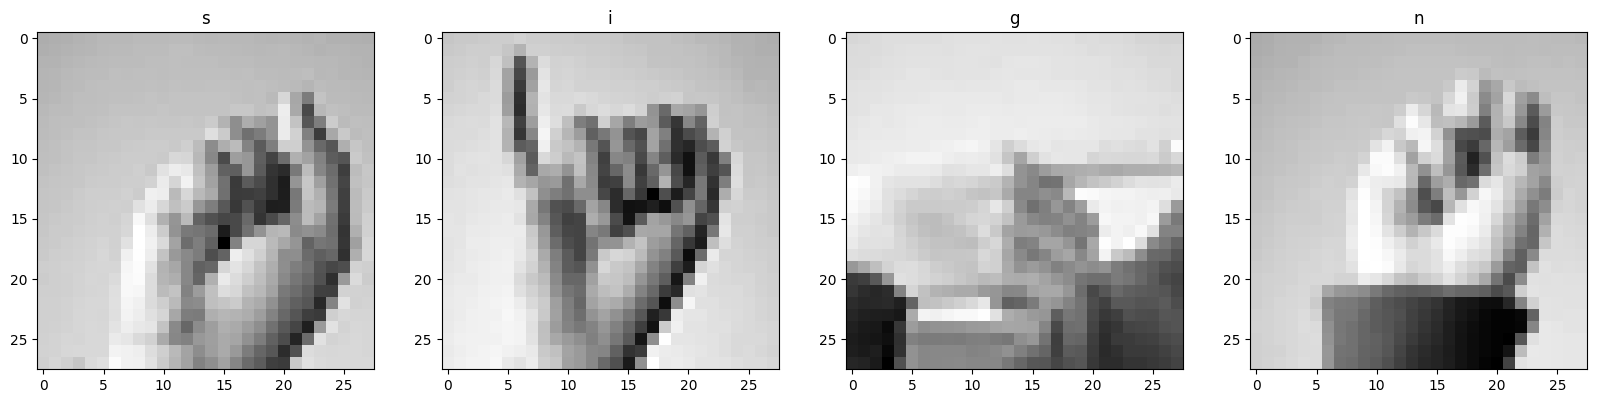

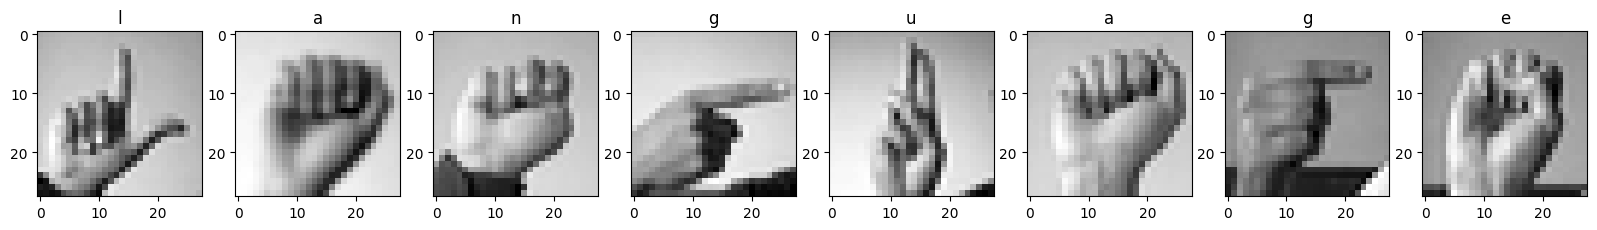

In [44]:
test_on_sentence(best_model, 'sign language', test_df.drop('label', axis=1), test_df['label'], label_binarizer)

# Initial End-to-End Workflow (End)

# Hyperparameter Tuning

1. Convolution and Max Pooling Pairs
2. Filters in the convolution layers
3. Filter Shape
4. Dropout

## Convolution and Max Pooling Pairs

Before flattening


1. For pair = 1 -> Output to the dense layer will be of the shape `(None, 14, 14, 32)`
2. For pair = 2 -> Output to the dense layer will be of the shape `(None, 7, 7, 64)`
3. For pair = 3 -> Output to the dense layer will be of the shape `(None, 3, 3, 96)`
4. For pair = 4 -> Output to the dense layer will be of the shape `(None, 1, 1, 128)`

As the output shape rapidly decreases for the pair = 4 it is better to choose among the pair = 1, 2 or 3

In [45]:
# 20% Validation Split

X_train, X_valid = X[:19500], X[19500:]
y_train, y_valid = y[:19500], y[19500:]

In [46]:
# Models
# 'models/experiment-1-1'
# 'models/experiment-1-2'
# 'models/experiment-1-3'

# History objects
# 'models/experiment-1-1-history'
# 'models/experiment-1-2-history'
# 'models/experiment-1-3-history'

n_pairs = 3
models_pairs = [keras.models.Sequential() for i in range(n_pairs)]
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

# Ensure the 'models' directory exists
os.makedirs('models', exist_ok=True)

for n in range(1, n_pairs+1):
    models_pairs[n-1].add(keras.layers.Conv2D(32, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    for i in range(1, n):
        
        models_pairs[n-1].add(keras.layers.Conv2D(32*(i+1), (5, 5), padding='same', activation='relu'))
        models_pairs[n-1].add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    models_pairs[n-1].add(keras.layers.Flatten())
    models_pairs[n-1].add(keras.layers.Dense(128, activation='relu'))
    models_pairs[n-1].add(keras.layers.Dense(24, activation='softmax'))
    models_pairs[n-1].compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Update the ModelCheckpoint callback to save the model with '.keras' extension
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-1-{n}.keras', save_best_only=True)
    
    # Train the model
    history = models_pairs[n-1].fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    
    # Save training history
    with open(f'models/experiment-1-{n}-history.pkl', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/15


/Users/vedantrai/vsc/aiml/Sign-Language-Recognition/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


610/610 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3867 - loss: 2.1689 - val_accuracy: 0.8752 - val_loss: 0.4468
Epoch 2/15
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9226 - loss: 0.3246 - val_accuracy: 0.9810 - val_loss: 0.1245
Epoch 3/15
610/610 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9924 - loss: 0.0806 - val_accuracy: 0.9999 - val_loss: 0.0335
Epoch 4/15
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9996 - loss: 0.0261 - val_accuracy: 1.0000 - val_loss: 0.0126
Epoch 5/15
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9999 - loss: 0.0108 - val_accuracy: 0.9999 - val_loss: 0.0105
Epoch 6/15
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 7/15
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 8/15
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_

In [47]:
models_pairs[0].summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,420,618 (9.23 MB)

 Trainable params: 806,872 (3.08 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,613,746 (6.16 MB)

In [48]:
models_pairs[1].summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,370,186 (5.23 MB)

 Trainable params: 456,728 (1.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 913,458 (3.48 MB)

In [49]:
models_pairs[2].summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 14, 14, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 7, 7, 96)       │       153,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 3, 3, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 864)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 958,826 (3.66 MB)

 Trainable params: 319,608 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 639,218 (2.44 MB)

In [50]:
for index in range(1, n_pairs+1):
    model = keras.models.load_model(f'models/experiment-1-{index}.keras')
    evaluation = model.evaluate(X_valid, y_valid)
    print(f'Model {index} Evaluation: {evaluation}')

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.0450e-04
Model 1 Evaluation: [0.00021719526557717472, 1.0]
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 2.6095e-04
Model 2 Evaluation: [0.000264869217062369, 1.0]
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 4.2816e-06
Model 3 Evaluation: [5.01911608807859e-06, 1.0]


In [51]:
h_1_1 = np.load('models/experiment-1-1-history', allow_pickle=True)
h_1_2 = np.load('models/experiment-1-2-history', allow_pickle=True)
h_1_3 = np.load('models/experiment-1-3-history', allow_pickle=True)

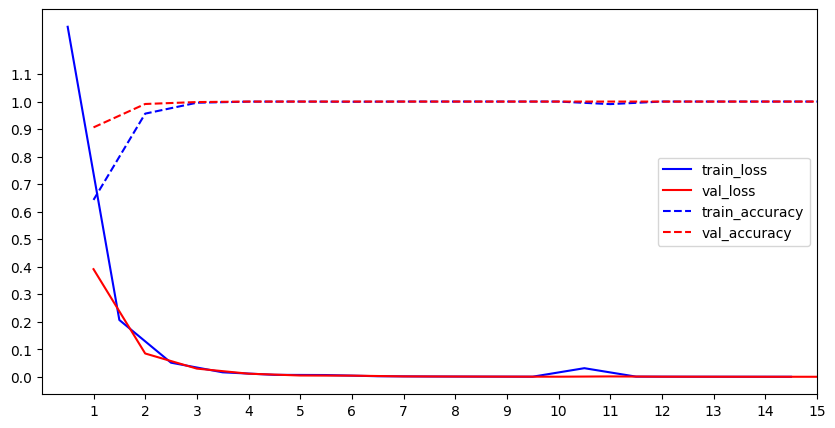

In [52]:
get_train_val_plots(h_1_1, yticks=np.arange(0, 1.2, 0.1))

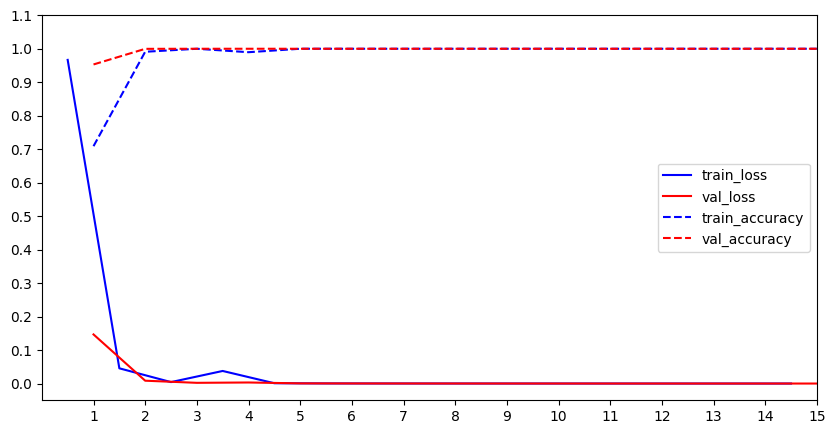

In [53]:
get_train_val_plots(h_1_2, yticks=np.arange(0, 1.2, 0.1))

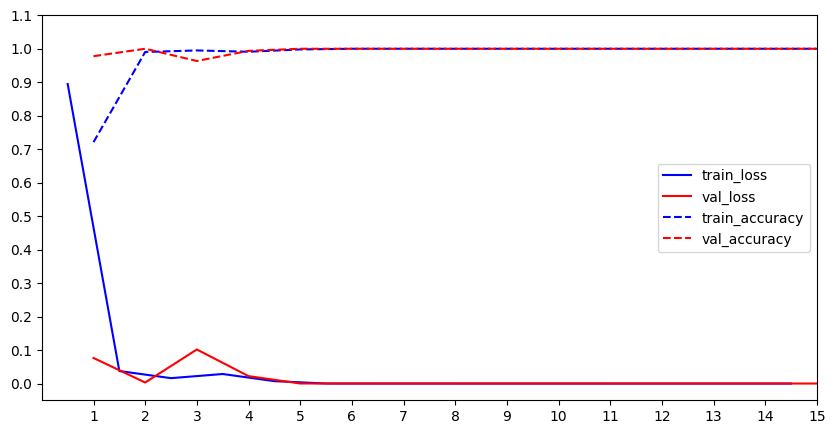

In [54]:
get_train_val_plots(h_1_3, yticks=np.arange(0, 1.2, 0.1))

Model 3 has the least loss on the validation data

## Filters


Number of filters maps can be

1. 8 - 16 - 32
2. 16 - 32 - 64
3. 24 - 48 - 96

In [55]:
n_tests = 3

# Ensure the 'models' directory exists
os.makedirs('models', exist_ok=True)

models = []
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

for i in range(n_tests):
    model = keras.models.Sequential()
    models.append(model)
    model.add(keras.layers.Input(shape=(28, 28, 1)))
    
    for pairs in range(3):
        model.add(keras.layers.Conv2D((8*(i+1))*(2**pairs), (5, 5), padding='same', activation='relu'))
        model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
        
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(24, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Save the model in .keras format
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fmaps-{i+1}.keras', save_best_only=True)
    
    # Train the model
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    
    # Save training history
    with open(f'models/experiment-fmaps-{i+1}-history.pkl', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3036 - loss: 2.2974 - val_accuracy: 0.8864 - val_loss: 0.3480
Epoch 2/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9295 - loss: 0.2252 - val_accuracy: 0.9816 - val_loss: 0.0685
Epoch 3/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9891 - loss: 0.0479 - val_accuracy: 0.9936 - val_loss: 0.0256
Epoch 4/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9982 - loss: 0.0096 - val_accuracy: 0.9775 - val_loss: 0.0670
Epoch 5/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9937 - loss: 0.0223 - val_accuracy: 0.9943 - val_loss: 0.0245
Epoch 6/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9878 - loss: 0.0400 - val_accuracy: 1.0000 - val_loss: 7.0916e-04
Epoch 7/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 5.1897e-04 - val_accuracy: 1.0000 - val_loss: 3.4822e-04
Epoch 8/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 1.0000 - loss: 2.5658e-04 - 

In [56]:
models[0].summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 8)      │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 16)     │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 7, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 7, 7, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,034 (660.29 KB)

 Trainable params: 56,344 (220.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 112,690 (440.20 KB)

In [57]:
models[1].summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,394 (1.62 MB)

 Trainable params: 141,464 (552.59 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 282,930 (1.08 MB)

In [58]:
models[2].summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 24)     │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 14, 14, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 48)     │        28,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 7, 7, 48)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 7, 7, 96)       │       115,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 3, 3, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 864)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 775,754 (2.96 MB)

 Trainable params: 258,584 (1010.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 517,170 (1.97 MB)

In [59]:
for index in range(n_tests):
    model = keras.models.load_model(f'models/experiment-fmaps-{index+1}.keras')
    model.evaluate(X_valid, y_valid)

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.2061e-04
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.6714e-04
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.7140e-05


In [60]:
h_2_1 = np.load('models/experiment-fmaps-1-history', allow_pickle=True)
h_2_2 = np.load('models/experiment-fmaps-2-history', allow_pickle=True)
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)

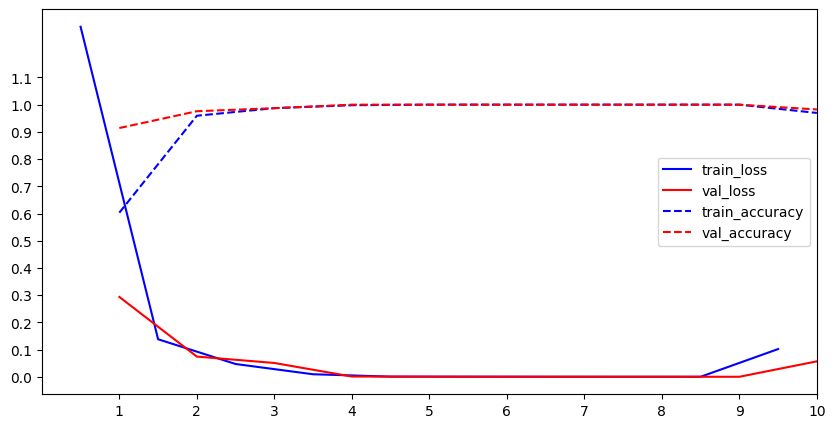

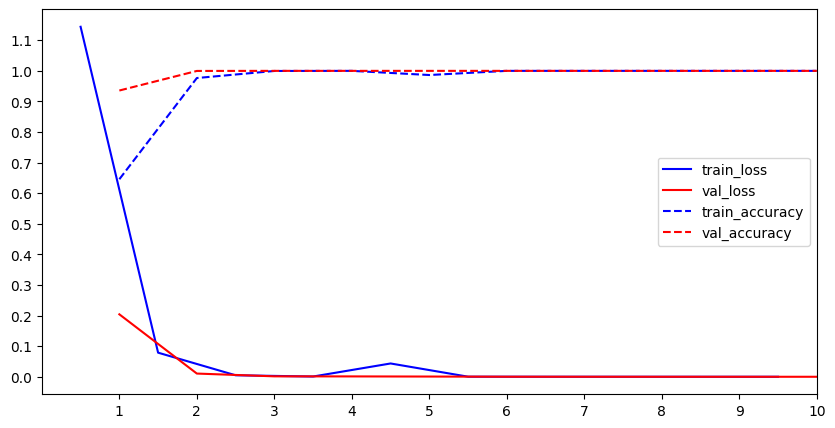

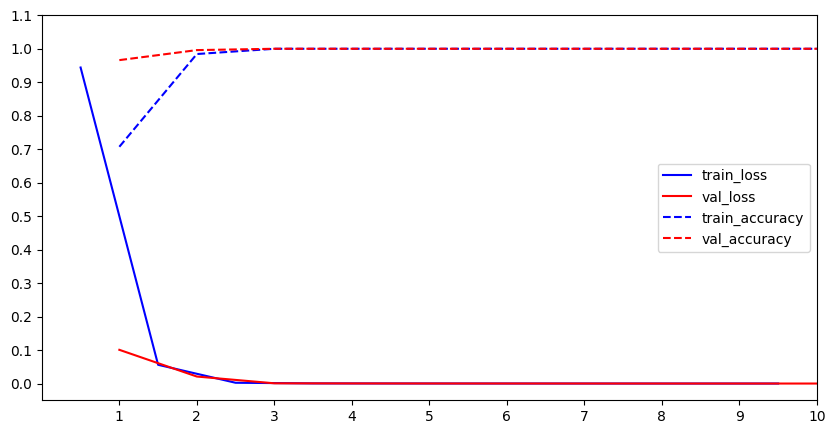

In [61]:
get_train_val_plots(h_2_1, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_2, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

Choose Model 3

## Filter Size

In [62]:
# Models
# 'models/experiment-fiters-1'

# History objects
# 'models/experiment-filters-1-history'

save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-fiters-1.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(24, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(48, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Conv2D(96, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
with open(f'models/experiment-filters-1-history', 'wb') as history_file:
    pickle.dump(history.history, history_file)

Epoch 1/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.3930 - loss: 2.0122 - val_accuracy: 0.9596 - val_loss: 0.1722
Epoch 2/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9680 - loss: 0.1190 - val_accuracy: 0.9982 - val_loss: 0.0179
Epoch 3/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9981 - loss: 0.0163 - val_accuracy: 0.9997 - val_loss: 0.0046
Epoch 4/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9935 - loss: 0.0239 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 5/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 1.0000 - loss: 8.8698e-04 - val_accuracy: 1.0000 - val_loss: 5.0292e-04
Epoch 6/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 1.0000 - loss: 3.9295e-04 - val_accuracy: 1.0000 - val_loss: 3.5670e-04
Epoch 7/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 1.0000 - loss: 2.4920e-04 - val_accuracy: 1.0000 - val_loss: 2.2066e-04
Epoch 8/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 1.0000 - loss: 

In [63]:
from tensorflow import keras

# Correct file path
model_path = 'models/experiment-fiters-1.keras'

try:
    # Load the model
    model = keras.models.load_model(model_path)
    
    # Evaluate the model
    evaluation = model.evaluate(X_valid, y_valid)
    print(f'Model Evaluation: {evaluation}')
except ValueError as e:
    print(f'Error loading model: {e}')
except FileNotFoundError as e:
    print(f'File not found: {e}')


249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 6.1474e-05
Model Evaluation: [7.412862032651901e-05, 1.0]


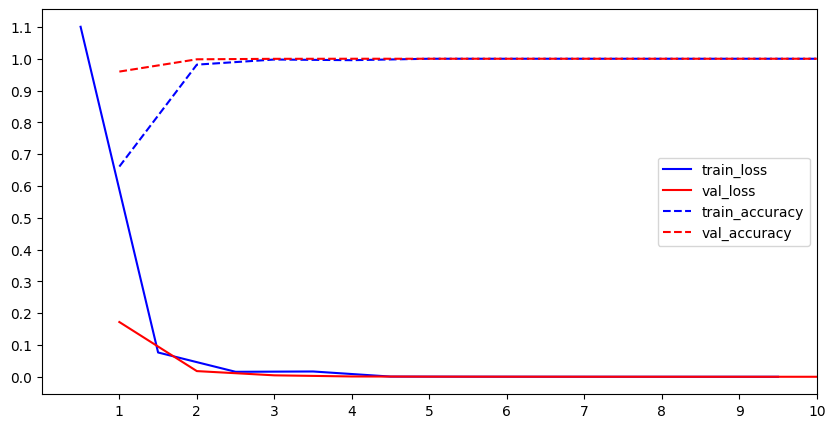

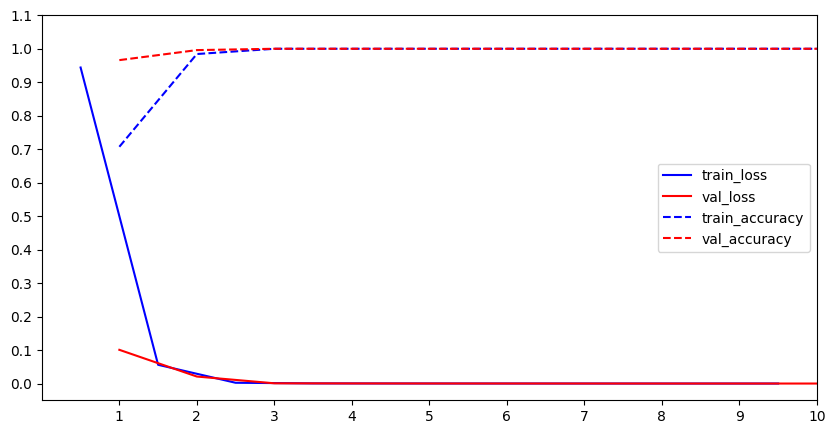

In [64]:
h_2_3 = np.load('models/experiment-fmaps-3-history', allow_pickle=True)
h = np.load('models/experiment-filters-1-history', allow_pickle=True)
get_train_val_plots(h, yticks=np.arange(0, 1.2, 0.1))
get_train_val_plots(h_2_3, yticks=np.arange(0, 1.2, 0.1))

We choose to use filter sizes of (5x5)

## Dropout

In [65]:
# Models
# 'models/experiment-dropout-0'
# 'models/experiment-dropout-1'
# 'models/experiment-dropout-2'

# History objects
# 'models/experiment-dropout-0-history'
# 'models/experiment-dropout-1-history'
# 'models/experiment-dropout-2-history'

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

dropout_rates = [0.3, 0.4, 0.5]

for index, i in enumerate(dropout_rates):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(24, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(48, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Conv2D(96, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dropout(i))
    model.add(keras.layers.Dense(24, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    save_best_cb = keras.callbacks.ModelCheckpoint(f'models/experiment-dropout-{index}.keras', save_best_only=True)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[save_best_cb, early_stopping_cb])
    with open(f'models/experiment-dropout-{index}-history', 'wb') as history_file:
        pickle.dump(history.history, history_file)

Epoch 1/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.1697 - loss: 2.7306 - val_accuracy: 0.8787 - val_loss: 0.4097
Epoch 2/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8162 - loss: 0.5419 - val_accuracy: 0.9872 - val_loss: 0.0636
Epoch 3/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9306 - loss: 0.2058 - val_accuracy: 0.9977 - val_loss: 0.0183
Epoch 4/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9607 - loss: 0.1176 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 5/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9751 - loss: 0.0744 - val_accuracy: 0.9999 - val_loss: 0.0021
Epoch 6/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9770 - loss: 0.0678 - val_accuracy: 1.0000 - val_loss: 7.2580e-04
Epoch 7/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9820 - loss: 0.0578 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/10
610/610 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9802 - loss: 0.061

In [66]:
for index in range(3):
    model = keras.models.load_model(f'models/experiment-dropout-{index}.keras')
    model.evaluate(X_valid, y_valid)

249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.0525e-04
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0043
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9909 - loss: 0.0847


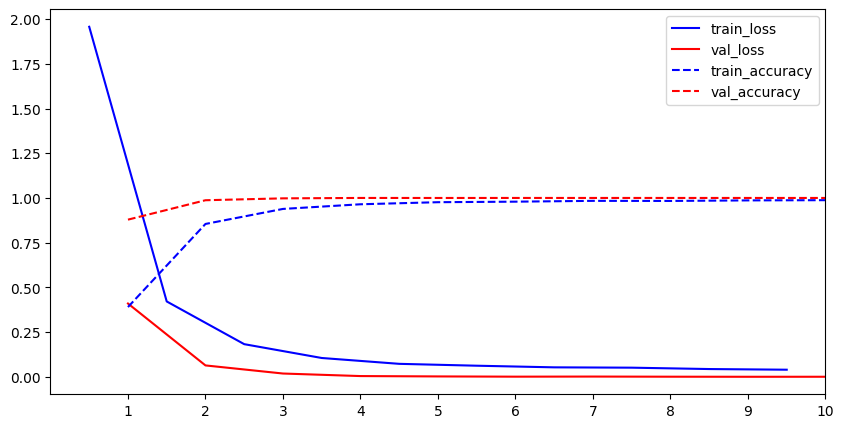

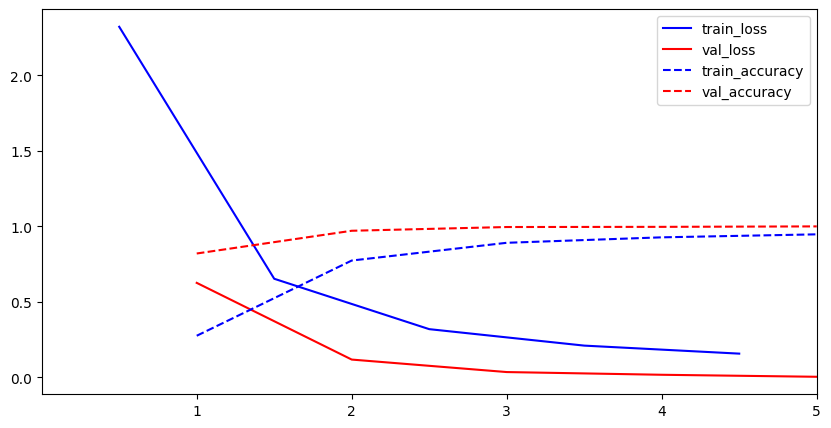

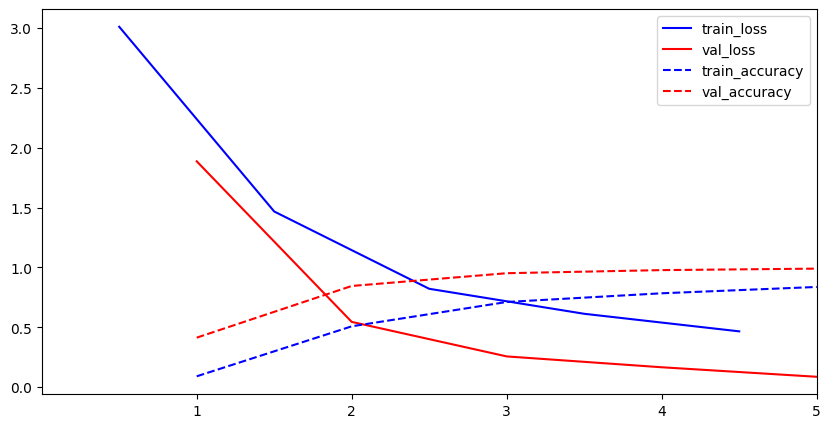

In [67]:
h_0 = np.load('models/experiment-dropout-0-history', allow_pickle=True)
h_1 = np.load('models/experiment-dropout-1-history', allow_pickle=True)
h_2 = np.load('models/experiment-dropout-2-history', allow_pickle=True)

get_train_val_plots(h_0)
get_train_val_plots(h_1)
get_train_val_plots(h_2)

Select Model 1

## Data Augmentation

In [68]:
data_augmentation = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),  # Specify the input shape here
    keras.layers.RandomRotation(0.1, fill_mode='nearest'),
    keras.layers.RandomZoom((0.15, 0.2), fill_mode='nearest'),
    keras.layers.RandomTranslation(0.1, 0.1, fill_mode='nearest')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Improves the models performance by decreasing the tendency to overfit

## Other Hyperparameters to try

1. Batch Normalization - It normalizes the layer inputs
2. Deeper networks work well - Replacing the single convolution layer of filter size (5X5) with two successive consecutive convolution layers of filter size (3X3)
3. Number of units in the dense layer and number of dense layers
4. Replacing the MaxPooling Layer with a convolution layer having a stride > 1
5. Optimizers
6. Learning rate of the optimizer

# Performance on the Test Set

In [69]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [70]:
model_path = 'models/experiment-dropout-0.keras'  

try:

    best_model = keras.models.load_model(model_path)
    print("Model loaded successfully.")
    
    evaluation = best_model.evaluate(X_valid, y_valid)
    print(f'Model Evaluation: {evaluation}')

except ValueError as e:
    print(f'Error loading model: {e}')
except FileNotFoundError as e:
    print(f'File not found: {e}')


Model loaded successfully.
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 1.0525e-04
Model Evaluation: [0.00011077281669713557, 1.0]


In [71]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9730 - loss: 34.7458
Loss: 33.344 Accuracy: 0.973


Accuracy: 96%

In [72]:
test_df = pd.read_csv('data/alphabet/sign_mnist_test.csv')
X_test, y_test = test_df.drop('label', axis=1), test_df['label']

In [73]:
# Applying normalisation which is applied for X_train
X_test /= 255.0

In [74]:
model_path = 'models/experiment-dropout-0.keras'  
best_model = keras.models.load_model(model_path)

In [75]:
evaluate_model(best_model, X_test, y_test, label_binarizer)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9729 - loss: 0.1434
Loss: 0.137 Accuracy: 0.973


Accuracy: 96%

In [103]:

# Model fine-tuning: Adding Dropout for regularization
from keras.utils import plot_model
from keras.layers import Dropout

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),  # Adding dropout to reduce overfitting
    keras.layers.Dense(26, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Adding this fine-tuning into the training loop (you can add early stopping as well):
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model with fine-tuning
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, 
                    callbacks=[early_stopping])


/Users/vedantrai/vsc/aiml/Sign-Language-Recognition/venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'X_val' is not defined

In [99]:

# Adding buffer-based smoothing logic to reduce noise during predictions

def predict_with_smoothing(image, model, binarizer, buffer_size=5):
    # Buffer to store recent predictions
    prediction_buffer = []
    
    preprocessed_image = preprocess_image(image)
    prediction = model.predict(preprocessed_image)
    index_to_letter_map = {i: chr(ord('a') + i) for i in range(26)}
    letter = index_to_letter_map[binarizer.inverse_transform(prediction)[0]]
    
    # Add prediction to buffer and remove oldest entry if buffer is full
    prediction_buffer.append(letter)
    if len(prediction_buffer) > buffer_size:
        prediction_buffer.pop(0)
    
    # Return most frequent letter in the buffer
    return max(set(prediction_buffer), key=prediction_buffer.count)

